<a href="https://colab.research.google.com/github/Arslonbekjon/Certificate-exams/blob/main/Aviakompaniya_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics



Gender: yo'lovchilarning jinsi (ayol, erkak)

Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

Age: yo'lovchilarning haqiqiy yoshi

Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

Flight distance: Ushbu sayohatning parvoz masofasi

Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi

Gate location: Darvoza joylashuvidan qoniqish darajasi

Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi

Online boarding: Onlayn bortdan qoniqish darajasi

Seat comfort: O'rindiqning qulayligidan qoniqish darajasi

Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

On-board service: Bort xizmatidan qoniqish darajasi

Leg room service: oyoq xonasi xizmatidan qoniqish darajasi

Baggage handling: bagajni tashishdan qoniqish darajasi

Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

Cleanliness: Tozalikdan qoniqish darajasi

Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari

Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari

Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

In [2]:
import zipfile

zf = zipfile.ZipFile('/content/aviakompaniya.zip')
train = pd.read_csv(zf.open('train_dataset.csv'),index_col=0)
test = pd.read_csv(zf.open('test_dataset.csv'),index_col=0)
sample = pd.read_csv(zf.open('sample_submission.csv'),index_col=0)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [4]:
train.shape

(10000, 23)

In [5]:
train['satisfaction'].value_counts()/len(train)*100

0    50.0
1    50.0
Name: satisfaction, dtype: float64

In [6]:
churn_rate = train['satisfaction'].value_counts()/len(train)*100

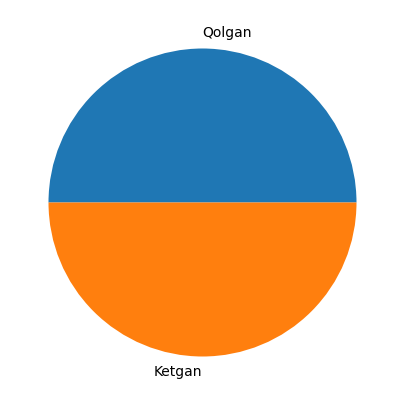

In [7]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

In [8]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Ba'zi ustunlarni tahlil qilib ko'ramiz

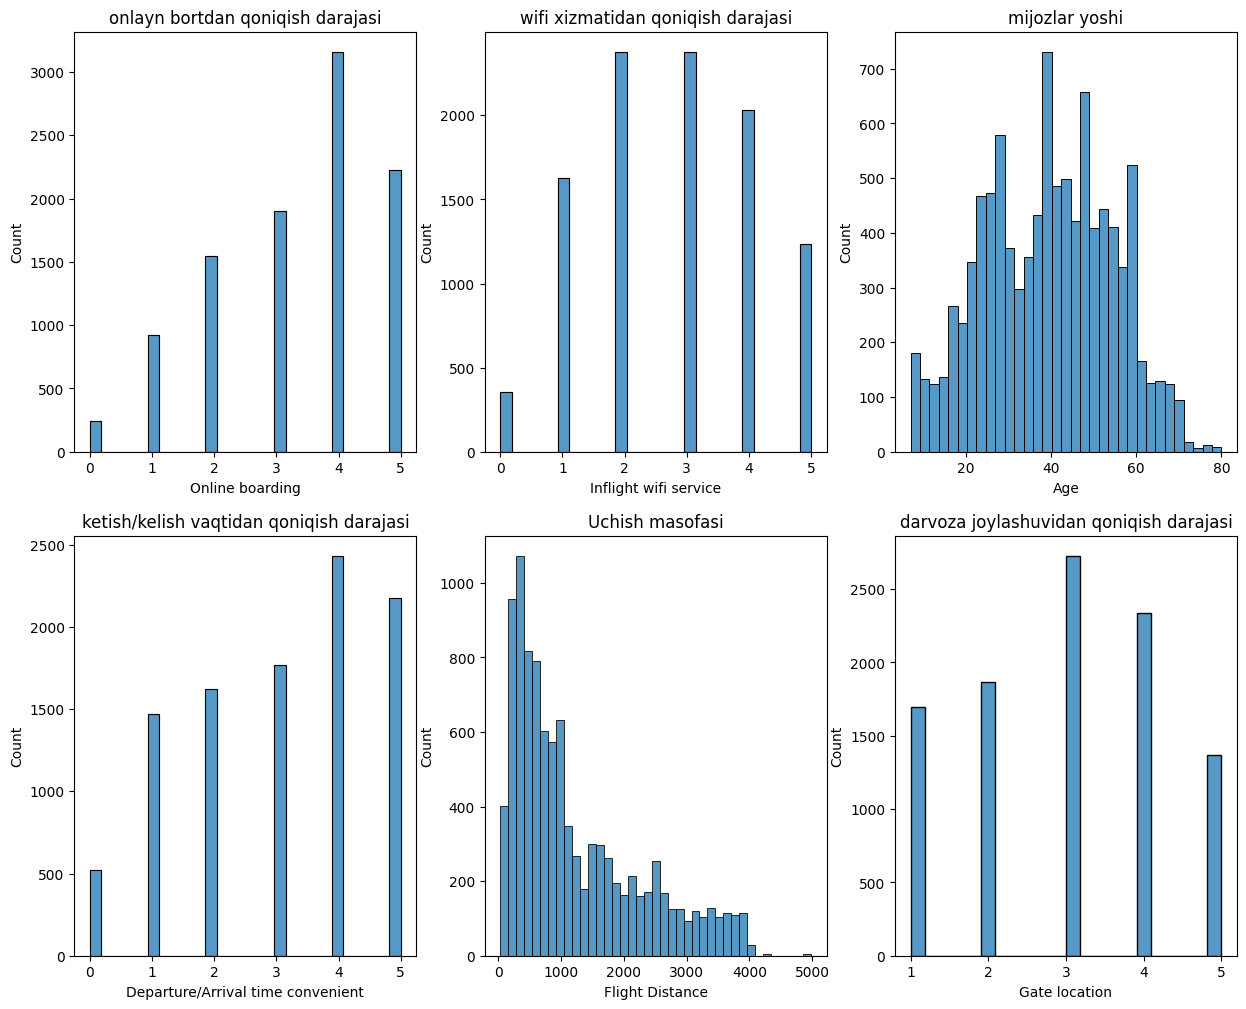

In [9]:
fig, axes = plt.subplots(2,3, figsize=(15,12))

# Gender
sns.histplot(x='Online boarding', data=train, ax=axes[0,0])
axes[0,0].set_title("onlayn bortdan qoniqish darajasi")

#'Customer Type'
sns.histplot(x='Inflight wifi service', data=train, ax=axes[0,1])
axes[0,1].set_title("wifi xizmatidan qoniqish darajasi")

# 'Type of Travel'
sns.histplot(x='Age', data=train, ax=axes[0,2])
axes[0,2].set_title("mijozlar yoshi")
###
#
sns.histplot(x='Departure/Arrival time convenient',data=train,ax=axes[1,0])
axes[1,0].set_title("ketish/kelish vaqtidan qoniqish darajasi")
#
sns.histplot(x='Flight Distance',data=train,ax=axes[1,1])
axes[1,1].set_title("Uchish masofasi")
#
sns.histplot(x='Gate location',data=train,ax=axes[1,2])
axes[1,2].set_title("darvoza joylashuvidan qoniqish darajasi")
plt.show()

Kategoriyali ustunlarni tahlil qilamiz

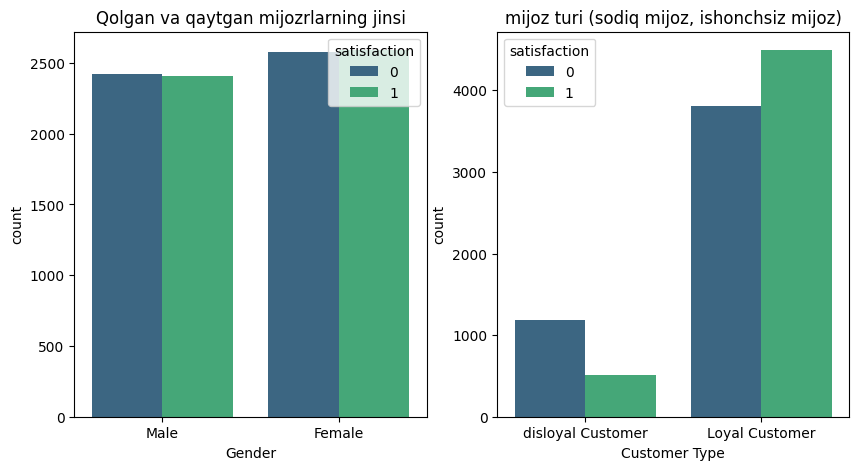

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=train, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=train, ax=axes[1])
axes[1].set_title("mijoz turi (sodiq mijoz, ishonchsiz mijoz)")
plt.show()

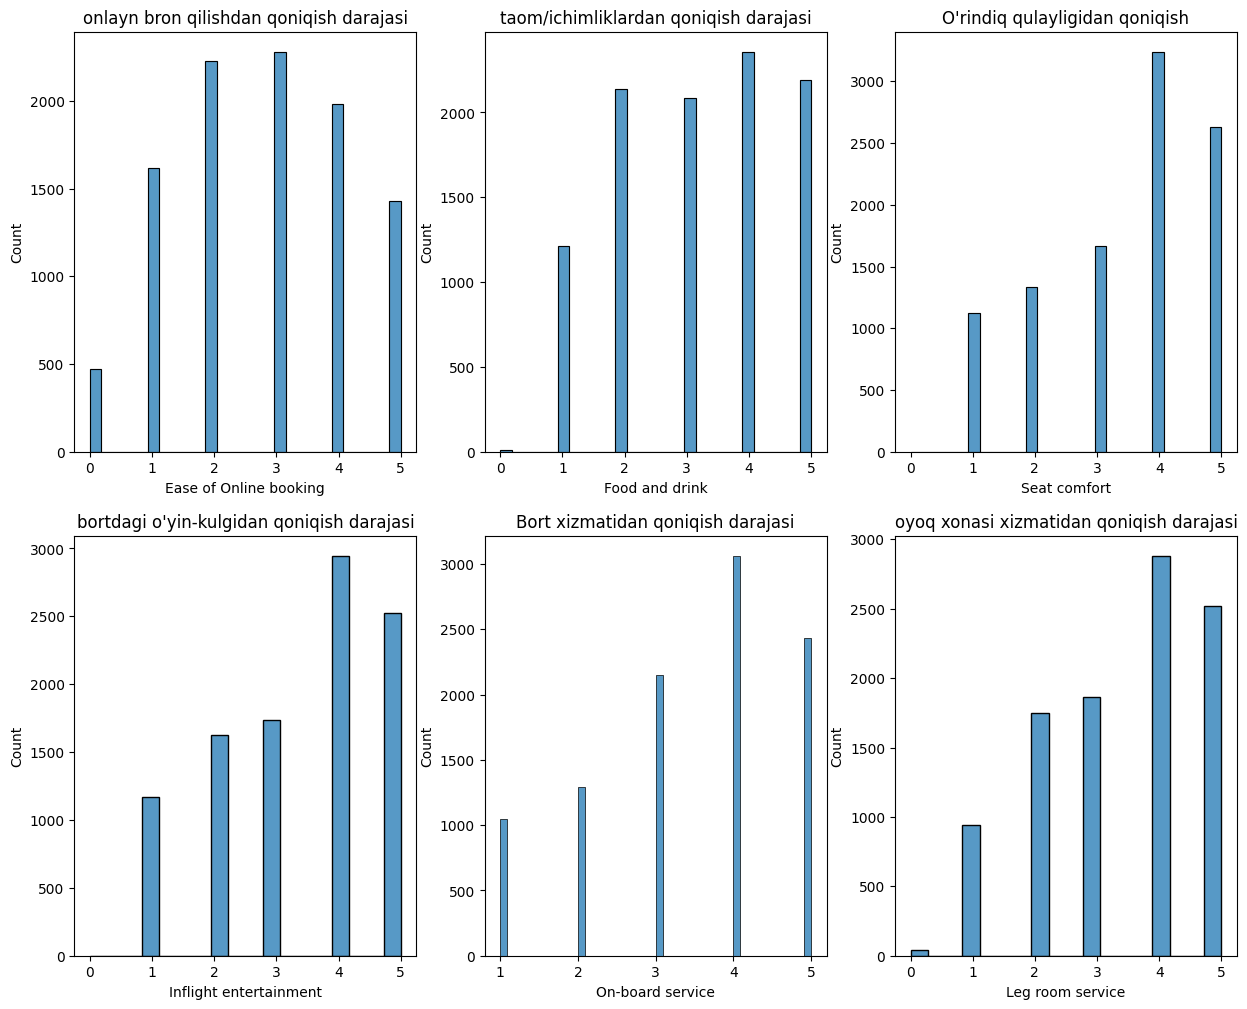

In [11]:
fig, axes = plt.subplots(2,3, figsize=(15,12))

# Gender
sns.histplot(x='Ease of Online booking', data=train, ax=axes[0,0])
axes[0,0].set_title("onlayn bron qilishdan qoniqish darajasi")

#'Customer Type'
sns.histplot(x='Food and drink', data=train, ax=axes[0,1])
axes[0,1].set_title("taom/ichimliklardan qoniqish darajasi")

# 'Type of Travel'
sns.histplot(x='Seat comfort', data=train, ax=axes[0,2])
axes[0,2].set_title("O'rindiq qulayligidan qoniqish")
###
#
sns.histplot(x='Inflight entertainment',data=train,ax=axes[1,0])
axes[1,0].set_title("bortdagi o'yin-kulgidan qoniqish darajasi")
#
sns.histplot(x='On-board service',data=train,ax=axes[1,1])
axes[1,1].set_title("Bort xizmatidan qoniqish darajasi")
#
sns.histplot(x='Leg room service',data=train,ax=axes[1,2])
axes[1,2].set_title("oyoq xonasi xizmatidan qoniqish darajasi")
plt.show()

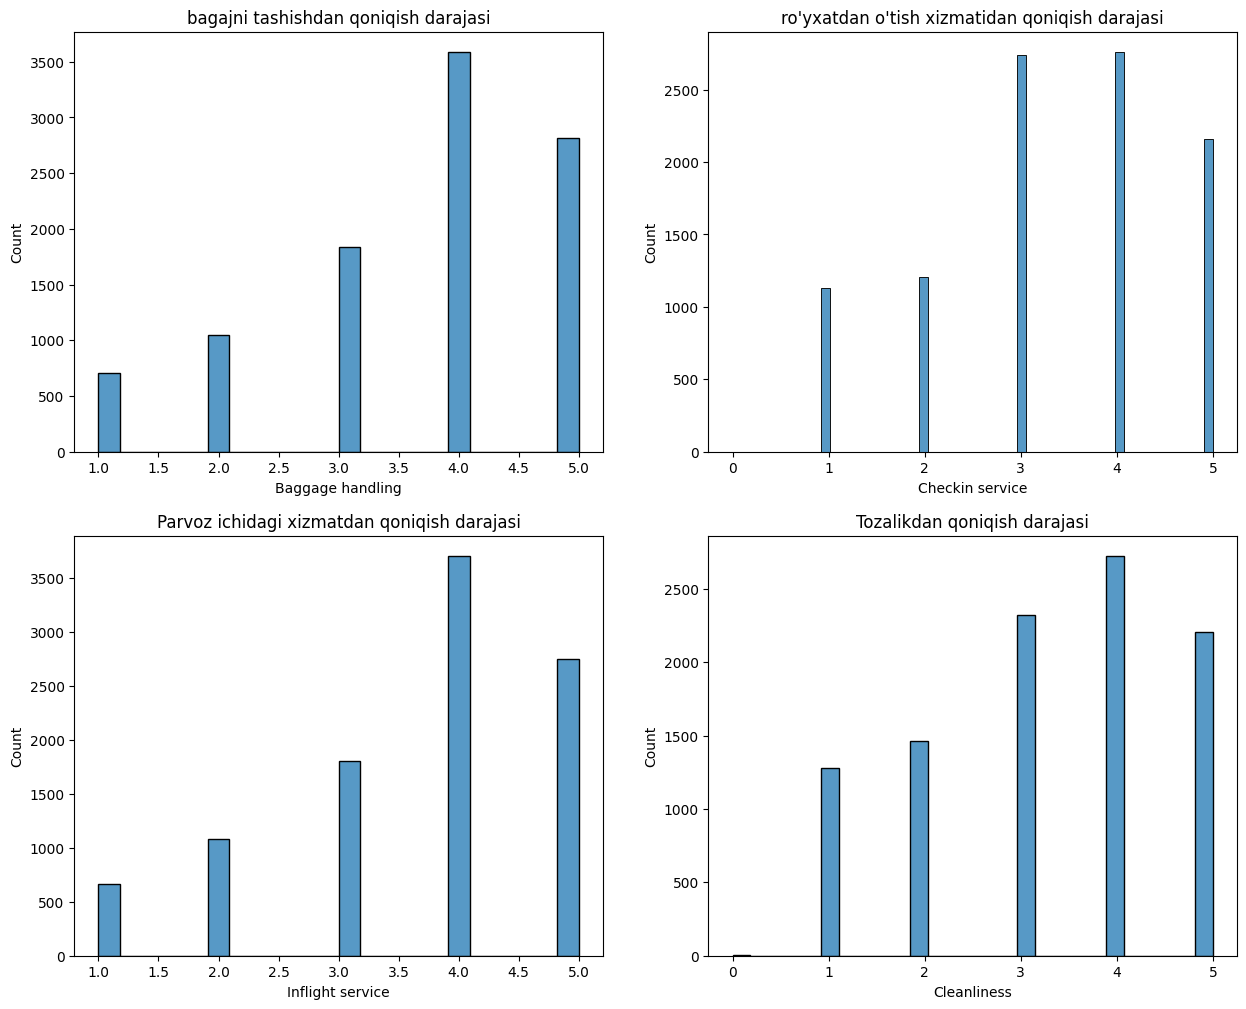

In [12]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

# Gender
sns.histplot(x='Baggage handling', data=train, ax=axes[0,0])
axes[0,0].set_title("bagajni tashishdan qoniqish darajasi")

#'Customer Type'
sns.histplot(x='Checkin service', data=train, ax=axes[0,1])
axes[0,1].set_title("ro'yxatdan o'tish xizmatidan qoniqish darajasi")

# 'Type of Travel'
sns.histplot(x='Inflight service', data=train, ax=axes[1,0])
axes[1,0].set_title("Parvoz ichidagi xizmatdan qoniqish darajasi")
###
#
sns.histplot(x='Cleanliness',data=train,ax=axes[1,1])
axes[1,1].set_title("Tozalikdan qoniqish darajasi")
#
"""sns.histplot(x='Departure Delay in Minutes',data=df,ax=axes[1,1])
axes[1,1].set_title("jo‘nash vaqtida kechikish daqiqalari")
#
sns.histplot(x='Arrival Delay in Minutes',data=df,ax=axes[1,2])
axes[1,2].set_title("yetib kelganda kechikish daqiqalari")"""
plt.show()

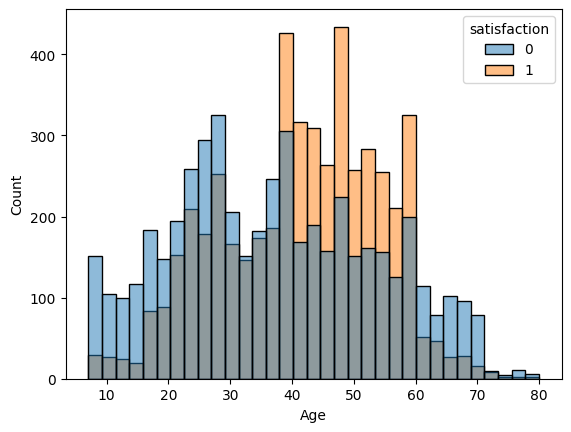

In [13]:
sns.histplot(data=train,x='Age',hue='satisfaction')
plt.show()

In [14]:
train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)

<ipython-input-14-27222bba04e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [15]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {train.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = train[train.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(train)*100)}%")


Mavjud bo'lmagan qiymatlar soni: 28
Mavjud bo'lmagan qatorlar soni: 28
Mavjud bo'lmagan qatorlar %: 0.0%


In [16]:
train.shape

(10000, 23)

In [17]:
train.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
4630,Male,Loyal Customer,41,Business travel,Business,238,2,2,2,2,...,4,4,4,4,4,4,4,0,0.0,1
7649,Female,Loyal Customer,48,Personal Travel,Eco,370,2,3,2,2,...,2,2,2,2,4,2,3,99,94.0,0
6948,Male,Loyal Customer,42,Business travel,Eco,230,4,1,1,1,...,4,5,4,4,4,5,4,53,47.0,1
6444,Female,Loyal Customer,41,Business travel,Business,2945,4,4,4,4,...,3,3,4,3,3,3,3,0,0.0,1
7475,Male,Loyal Customer,28,Business travel,Business,1610,2,2,2,2,...,4,4,2,5,4,4,4,0,0.0,1


In [18]:
train[train['Age'].isna()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,


In [19]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [21]:
#np.mean(train['Arrival Delay in Minutes'])
train[train['Arrival Delay in Minutes'].isnull()].head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
143,Male,Loyal Customer,25,Business travel,Business,2685,2,2,2,2,...,4,4,4,4,5,5,5,175,NaN,1
278,Female,Loyal Customer,63,Business travel,Business,3104,3,2,3,3,...,4,4,4,4,4,4,3,0,NaN,1
282,Female,Loyal Customer,40,Business travel,Eco,1214,4,3,3,3,...,4,2,2,4,3,1,4,110,NaN,1
428,Male,Loyal Customer,70,Personal Travel,Eco,298,2,4,2,3,...,1,3,2,4,3,5,1,0,NaN,0
478,Female,Loyal Customer,8,Personal Travel,Business,842,3,5,3,5,...,3,2,5,4,5,1,3,5,NaN,0


In [24]:
train.fillna(method='ffill',inplace=True)

In [25]:
train[train['Arrival Delay in Minutes'].isnull()].head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,


In [26]:
train_enc = pd.get_dummies(train)
test_enc = pd.get_dummies(test)
train_enc.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,33,571,2,3,2,4,4,2,4,4,...,0,0,1,0,1,1,0,0,1,0
2,49,1431,4,1,4,4,3,5,4,5,...,1,1,0,1,0,1,0,1,0,0
3,43,867,1,4,4,4,4,4,3,1,...,0,1,0,1,0,1,0,0,1,0
4,27,1550,3,3,3,3,2,2,2,2,...,1,1,0,1,0,1,0,1,0,0
5,11,526,3,4,3,2,4,3,4,4,...,0,0,1,1,0,0,1,0,1,0


In [27]:
Cols = train_enc.columns.intersection(test_enc.columns)

In [28]:
X = train_enc.drop("satisfaction", axis=1)
y = train_enc['satisfaction'].copy()

In [29]:
X=X[Cols]


In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
#Cols = train_enc.columns.intersection(test_enc.columns)

In [31]:
test = scaler.transform(test_enc)

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#ML bosqichi
Logistik Regression


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.87      0.85      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Model aniqligi: 0.865


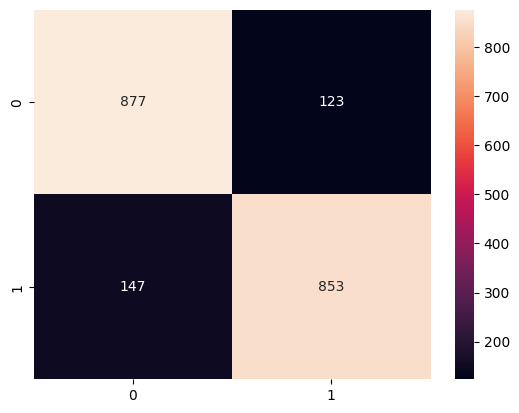

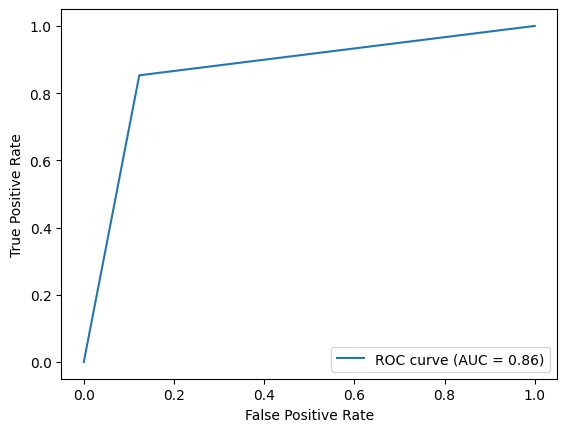

In [33]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Support Vector Machines

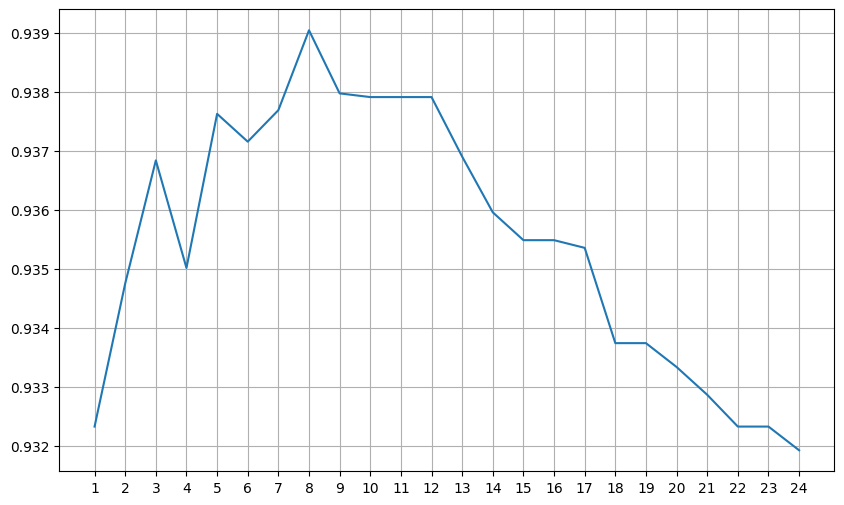

In [34]:
f1 = []
for k in range(1,25):
  C = SVC(C=k) # k-ni qiymati
  C.fit(X_train,y_train)
  y_predict = C.predict(X_test)
  f1.append(metrics.f1_score(y_test,y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":np.arange(1,25)}

C_gscv = GridSearchCV(C, param_grid,cv=5)

C_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(C=24),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [36]:
C_gscv.best_params_

{'C': 5}

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1000
           1       0.94      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.938


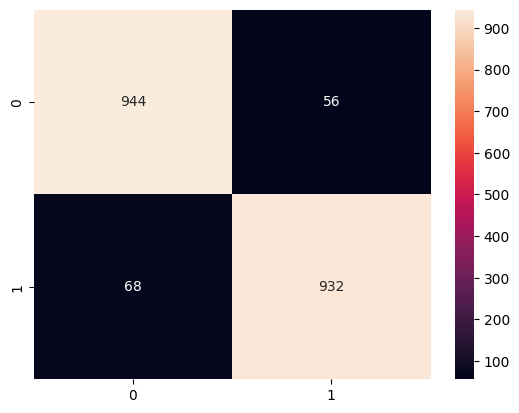

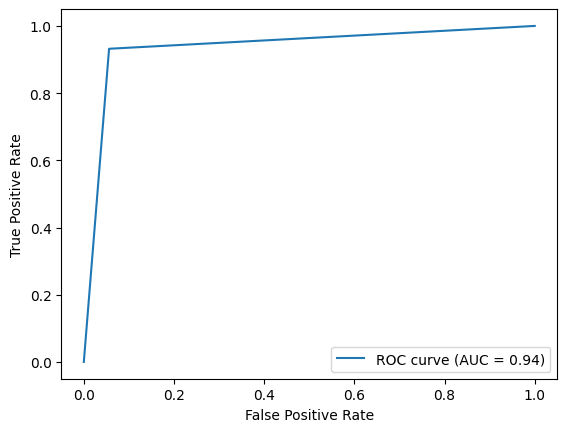

In [37]:
# Modelni yaratamiz (training)
svm_model = SVC(C=5)
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree

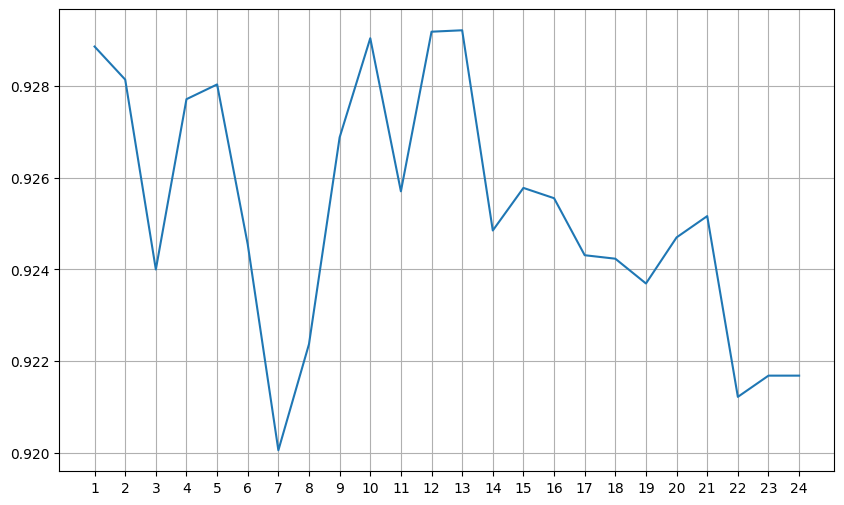

In [45]:
f1 = []
for k in range(1,25):
  tree = DecisionTreeClassifier(min_samples_leaf=k) # k-ni qiymati
  tree.fit(X_train,y_train)
  y_predict = tree.predict(X_test)
  f1.append(metrics.f1_score(y_test,y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_leaf":np.arange(1,25)}

C_gscv = GridSearchCV(tree, param_grid,cv=5)

C_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(min_samples_leaf=24),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [47]:
C_gscv.best_params_

{'min_samples_leaf': 4}

In [ ]:
"""ValueError: Invalid parameter 'tree' for estimator DecisionTreeClassifier(max_depth=24).
Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features',
 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']."""

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1000
           1       0.95      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.93      0.93      2000

Model aniqligi: 0.9345


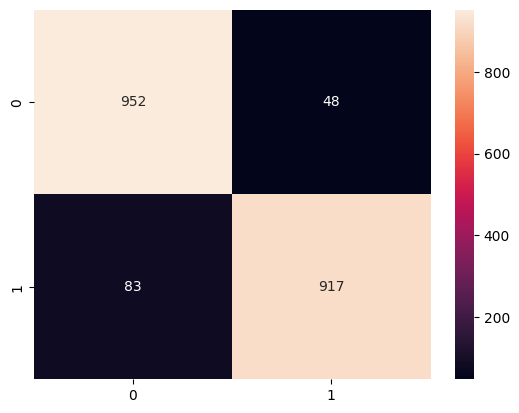

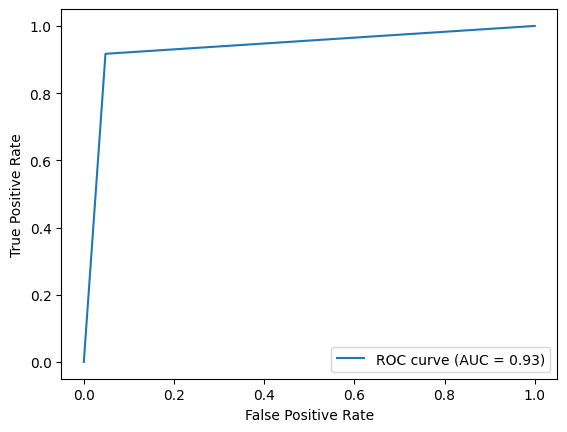

In [48]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0002,max_depth=12,min_samples_leaf=4)
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

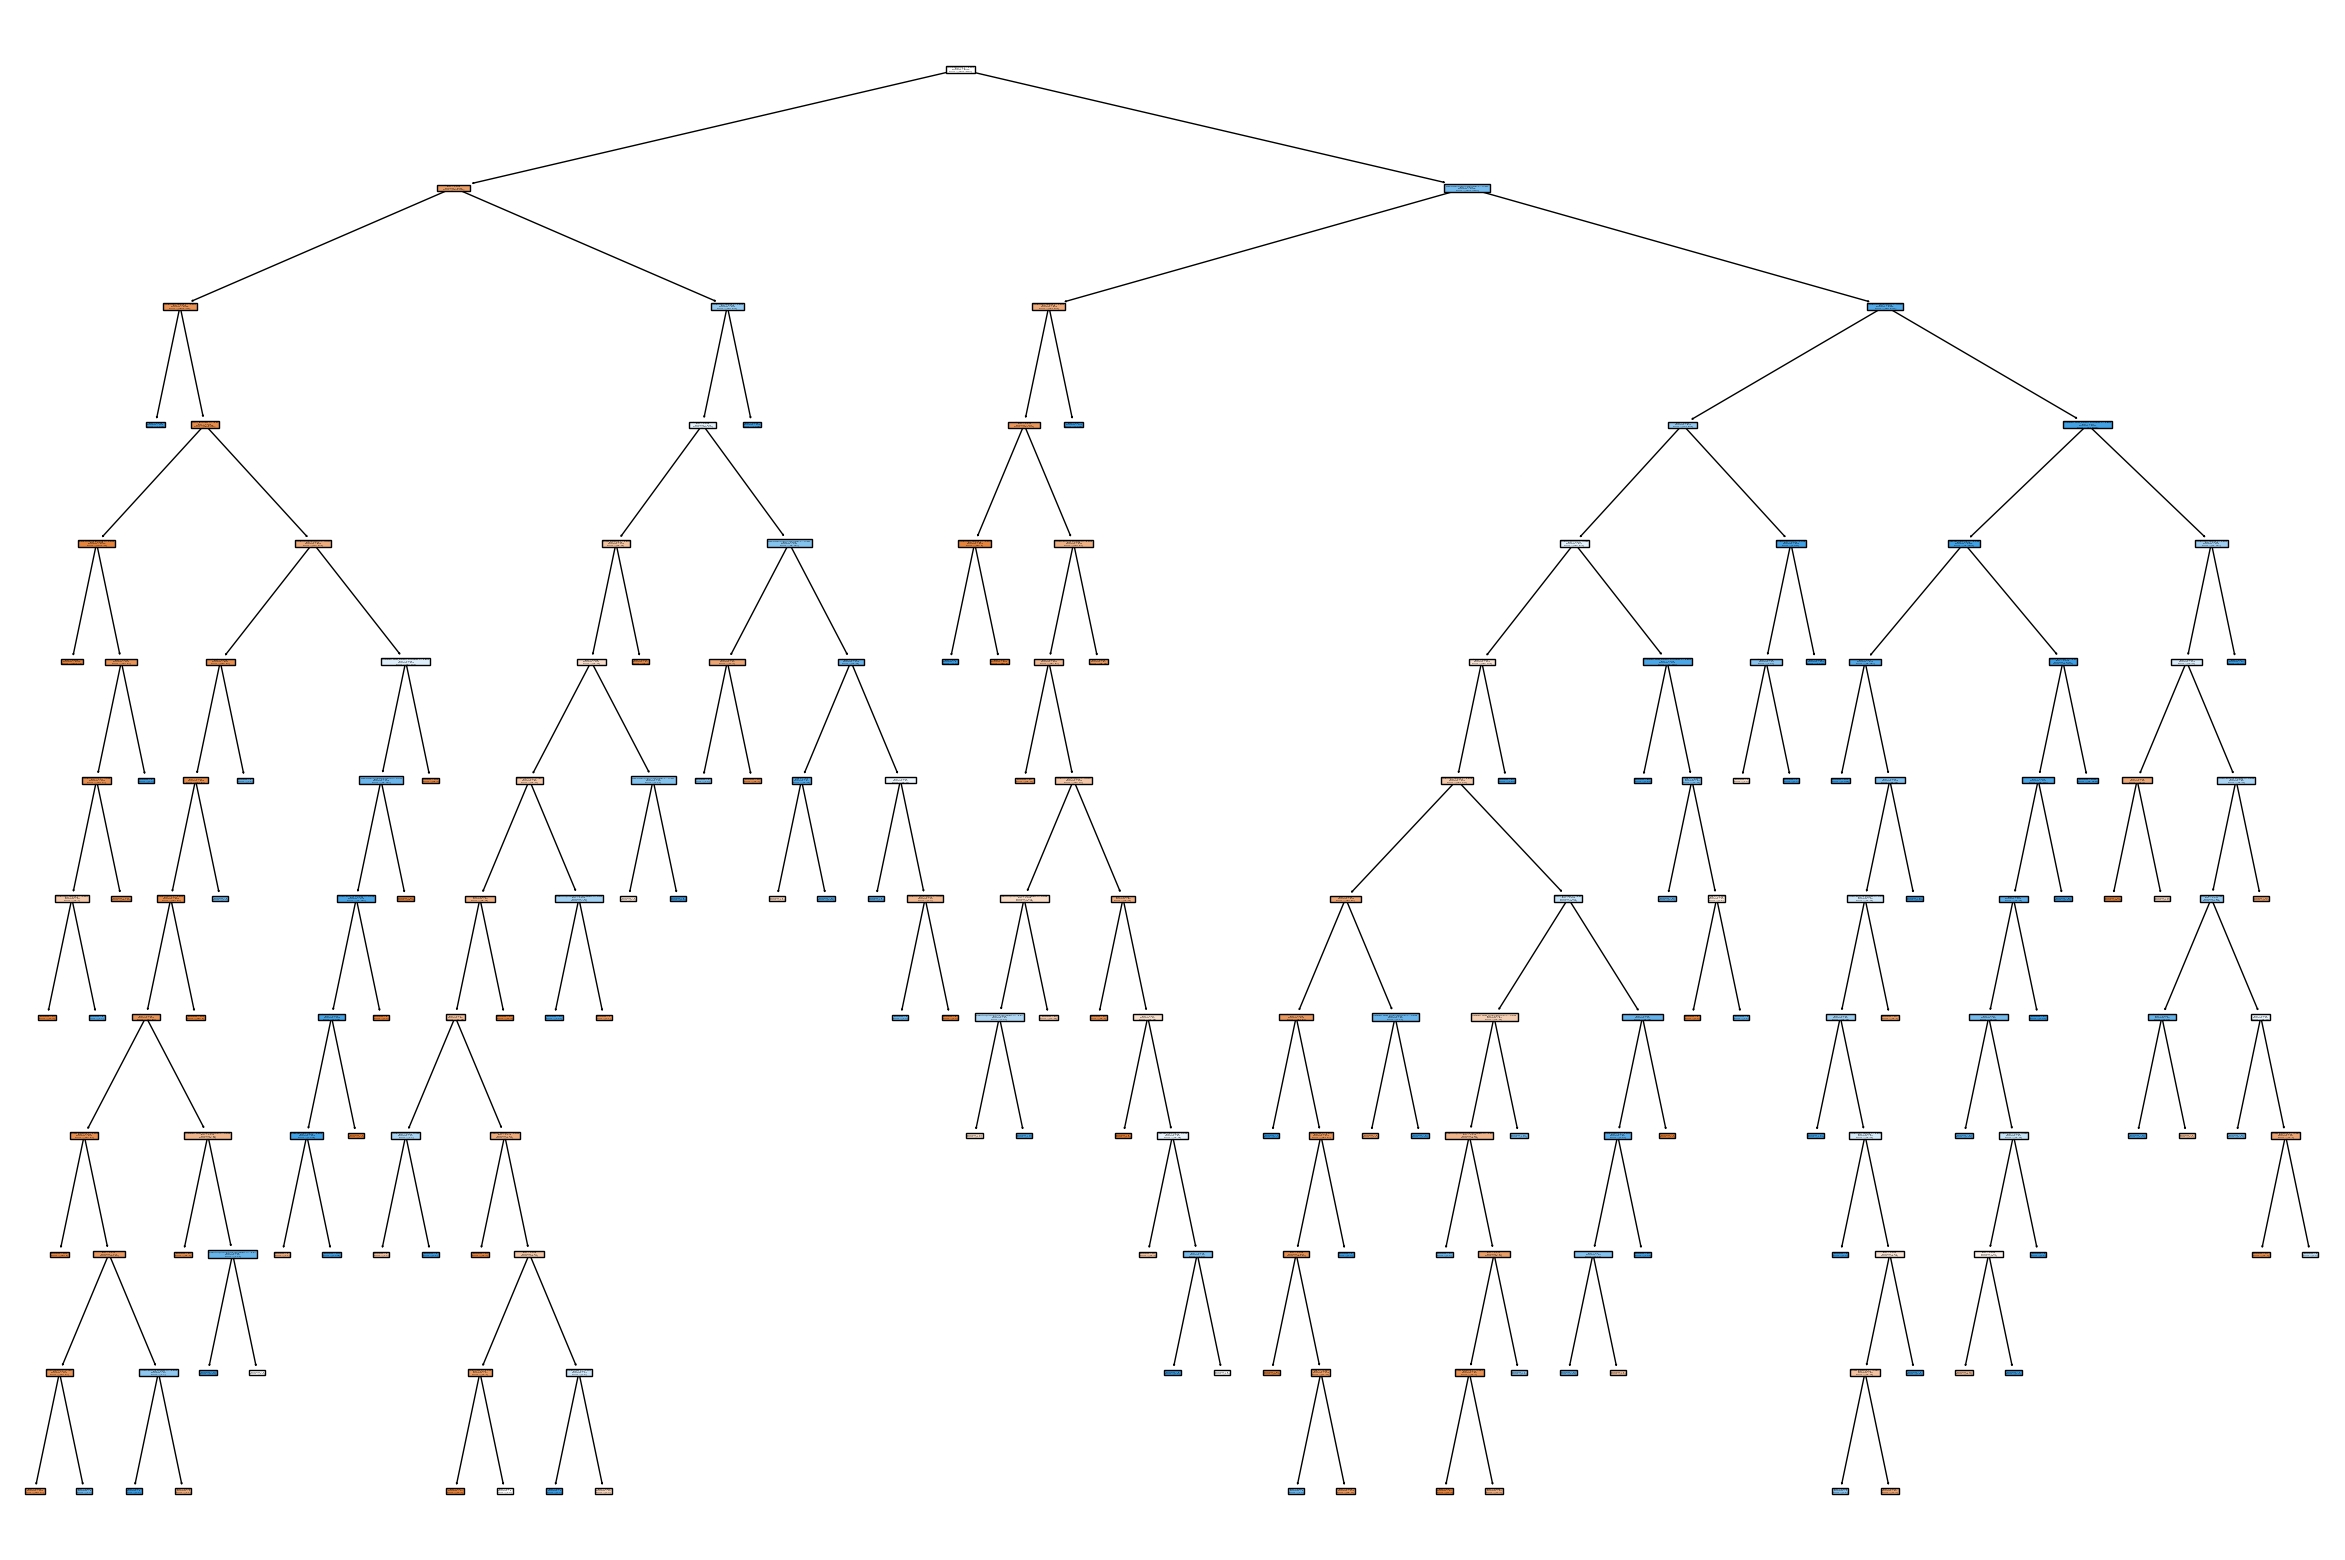

In [49]:
cols = train_enc.drop('satisfaction', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

### Random Forest

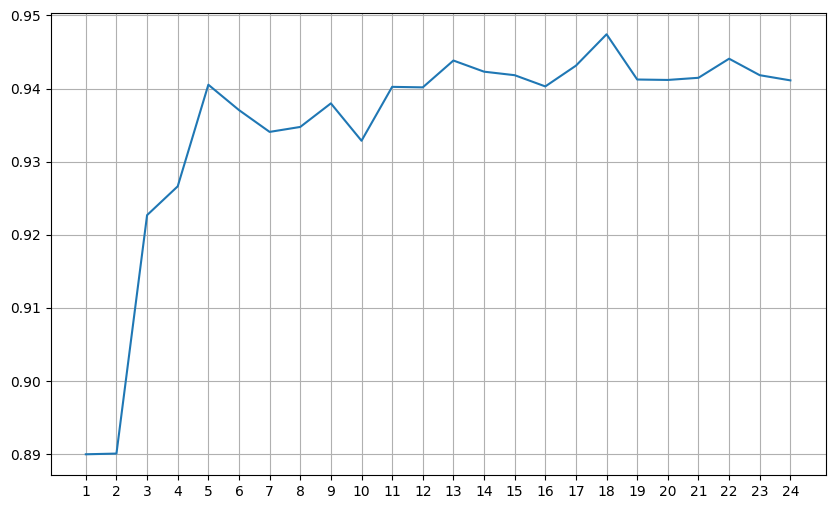

In [50]:
f1 = []
for k in range(1,25):
  Rfc = RandomForestClassifier(n_estimators=k) # k-ni qiymati
  Rfc.fit(X_train,y_train)
  y_predict = Rfc.predict(X_test)
  f1.append(metrics.f1_score(y_test,y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":np.arange(1,25)}

Rfc_gscv = GridSearchCV(Rfc, param_grid,cv=5)

Rfc_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=24),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [52]:
Rfc_gscv.best_params_

{'n_estimators': 23}

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.943


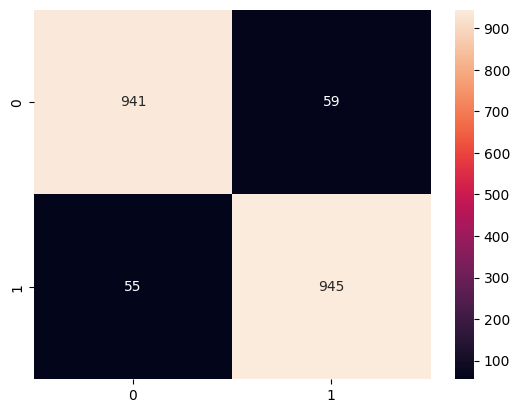

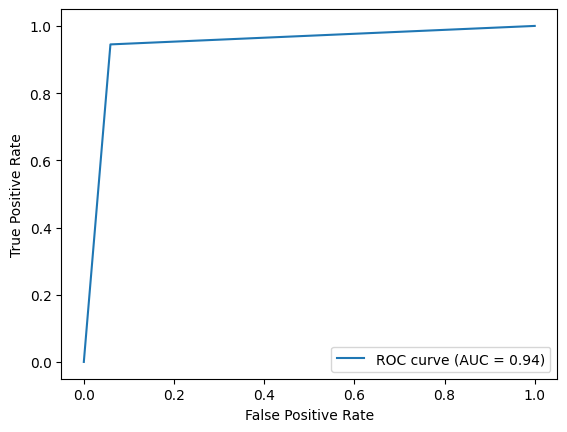

In [53]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=23)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

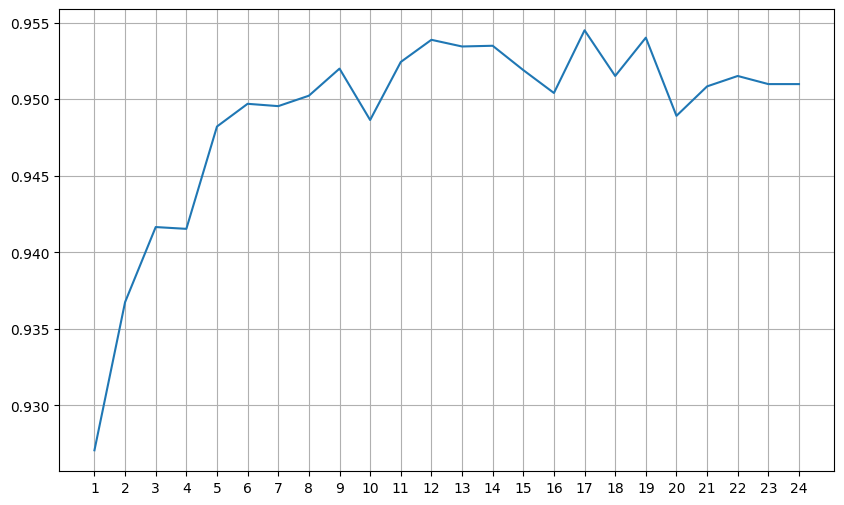

In [54]:
f1 = []
for k in range(1,25):
  xgb = XGBClassifier(max_depth=k) # k-ni qiymati
  xgb.fit(X_train,y_train)
  y_predict = xgb.predict(X_test)
  f1.append(metrics.f1_score(y_test,y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth":np.arange(1,25)}

xgb_gscv = GridSearchCV(xgb, param_grid,cv=5)

xgb_gscv.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=24,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [56]:
xgb_gscv.best_params_

{'max_depth': 16}

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqligi: 0.951


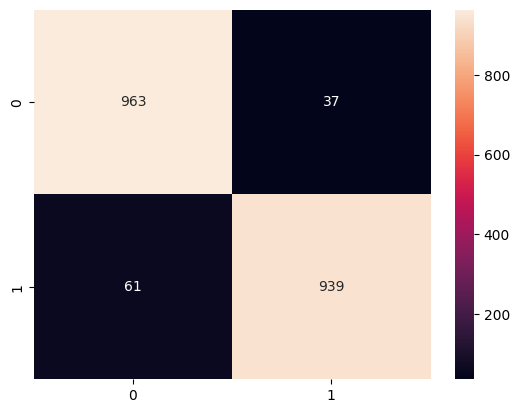

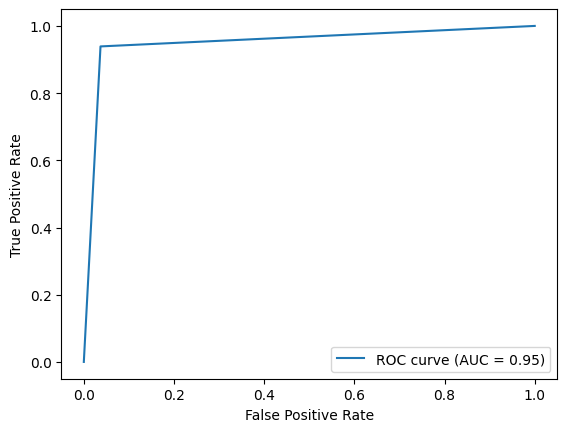

In [57]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier(max_depth=16)
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [58]:
y_predict_XGB = xgb_model.predict(test)

In [59]:
sample['satisfaction']=y_predict_XGB
sample.sample(13)

,satisfaction
id,
1769,1
2540,1
2722,0
1647,1
2124,1
2438,0
1910,0
743,0
640,0


In [60]:
sample.to_csv('sample_Aviakompaniya.csv')